Soccer Data Tale:

Description: This European Soccer dataset contains the information of various football matches conducted in the period from 2007 to 2016 in which around 11000 players are involved.
This dataset contains 41 features which includes 
player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes.

Problem Statement:
By doing the analysis on the dataset, we need to effectively predict the feature 'overall_rating' given the remaning features.



# <font color ='red'> Soccer Data Tale</font>

In [ ]:
# Description about what is soccer and the game , how it emerged, fifa game and so on...

## <font color ='orange'> Problem Statement </font>

In [ ]:
# Describe about the target variable and other features

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import copy
pd.options.display.max_rows=40
pd.options.display.max_columns=40
from scipy.stats import mode
from sklearn import preprocessing
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
warnings.simplefilter(action='ignore', category = DeprecationWarning)
warnings.simplefilter(action='ignore', category = UserWarning)


By default system will consider only Standard Missing Values like NaN,NA,'', as null values.
Inorder to handle different null values effectively we have maintained a list called 'missing_values'.

In [4]:
missing_values=['','NaN','n/a','na',' ','NA','_0','0','None']


### <font color='orange'> Understanding Data</font>

Along with reading the data, the missing values are also assigned to the function 'read_csv'.

In [5]:
soccer_raw_data=pd.read_csv('E:\\soccer_data.csv', na_values=missing_values)


In [6]:
soccer_raw_data.shape

(183978, 43)

In [ ]:
# Describe  no of rows and cols in the data

In [5]:
soccer_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 43 columns):
Unnamed: 0             183977 non-null float64
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    177109 non-null object
defensive_work_rate    180551 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_c

In [ ]:
#  No of data types used in data

In [ ]:
# Display entire columns of the data in the head function

In [6]:
soccer_raw_data.head()

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,NaN,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1.0,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2.0,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3.0,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,...,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4.0,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,...,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
# Provide explaination to each column names

Features like id,player_fifa_api_id,player_api_id,date are very unique and does not constitute to overall_rating of the players.
So, removing these features.

In [7]:
soccer_data=soccer_raw_data.iloc[:,5:]


In [8]:
soccer_data.shape

(183978, 38)

In [ ]:
# Add explaination after removing features how the data looks like now

In [9]:
soccer_data.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
# Try using soccer_data.describe() 

In [10]:
soccer_data.describe(include='all') 

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183142.000000,183142.000000,183142,177109,180551,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
unique,NaN,NaN,2,7,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,right,medium,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,138409,125070,130846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68.600015,73.460353,NaN,NaN,NaN,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,7.041139,6.592271,NaN,NaN,NaN,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,33.000000,39.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,NaN,NaN,NaN,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,NaN,NaN,NaN,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,78.000000,NaN,NaN,NaN,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000


### <font color='orange'>Data Cleaning </font>

In [ ]:
# Add, finding null values in data
# Plot missing values using  package missingno

In [12]:
soccer_data.isnull().sum()

overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    6869
defensive_work_rate    3427
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
gk_diving               836
gk_handling             836
gk_kicking          

Let us drop the records which have null values present across all features.

In [11]:
soccer_rem_null=soccer_data.dropna(how='all')


Checking time , for the data left over !!!!

In [14]:
soccer_rem_null.shape


(183142, 38)

In [15]:
soccer_rem_null.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Seeing first two rows it looks like data is having lots of duplicates in it. So, let us retain only unique records.

In [16]:
soccer_rem_dup=soccer_rem_null.drop_duplicates()

Data  looks like this after eliminating duplicates from it

In [17]:
soccer_rem_dup.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [18]:
soccer_rem_dup.shape

(138439, 38)

Sorting features based on the null values in the descending order 

In [19]:
soccer_rem_dup.isnull().sum().sort_values(ascending=False).to_frame('null count')

,null count
attacking_work_rate,4770
defensive_work_rate,1965
agility,1481
balance,1481
sliding_tackle,1481
jumping,1481
vision,1481
curve,1481
volleys,1481
dribbling,0


Extracting numerical and categorical features from the data

In [20]:
numerical_var = []
for var in soccer_rem_dup.select_dtypes(['int64','float64']):
    numerical_var.append(var)

In [21]:
numerical_var

['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

Imputing the null values present in Numerical Variables using "SimpleImputer" method

In [22]:
from sklearn.impute import SimpleImputer

Inorder to access this "SimpleImputer" method we need to assign it to a variable

In [23]:
num_si=SimpleImputer()


"fit_transform" function performs the two operations respectively:- Firstly, it fits the parameters on the data and thereby transforms it into an array. SimpleImputer too makes use of this function.

In [24]:
imputed_numerical_soccer=num_si.fit_transform(soccer_rem_dup[numerical_var])

Now, all the null values in each numerical column is replced by column mean

In [25]:
imputed_numerical_soccer

array([[67., 71., 49., ..., 10.,  8.,  8.],
       [62., 66., 49., ..., 10.,  8.,  8.],
       [61., 65., 48., ...,  9.,  7.,  7.],
       ...,
       [77., 80., 74., ..., 73., 20., 20.],
       [78., 81., 74., ..., 73., 20., 20.],
       [80., 81., 74., ..., 78.,  7., 15.]])

Passing the transformed columns to a dataframe.

In [26]:
imputed_numerical_soccer=pd.DataFrame(imputed_numerical_soccer,columns=numerical_var)

In [27]:
imputed_numerical_soccer.head()
# Now we can see none of the columns are having the null values.

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
2,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
3,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
4,74.0,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [28]:
imputed_numerical_soccer.isnull().sum().sort_values(ascending=False)

gk_reflexes           0
curve                 0
agility               0
sprint_speed          0
acceleration          0
ball_control          0
long_passing          0
free_kick_accuracy    0
dribbling             0
balance               0
volleys               0
short_passing         0
heading_accuracy      0
finishing             0
crossing              0
potential             0
reactions             0
shot_power            0
gk_positioning        0
penalties             0
gk_kicking            0
gk_handling           0
gk_diving             0
sliding_tackle        0
standing_tackle       0
marking               0
vision                0
jumping               0
positioning           0
interceptions         0
aggression            0
long_shots            0
strength              0
stamina               0
overall_rating        0
dtype: int64

In [29]:
cat_var = []
for var in soccer_rem_dup.select_dtypes(['object']):
    cat_var.append(var)

Imputing null values present in Categorical Variables with "Mode"

In [35]:
soccer_rem_dup.isnull().sum()

overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    4770
defensive_work_rate    1965
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1481
dribbling                 0
curve                  1481
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1481
reactions                 0
balance                1481
shot_power                0
jumping                1481
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1481
penalties                 0
marking                   0
standing_tackle           0
sliding_tackle         1481
gk_diving                 0
gk_handling               0
gk_kicking          

In [36]:
soccer_rem_dup.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [39]:
soccer_rem_dup[cat_var] = soccer_rem_dup[cat_var].fillna(soccer_rem_dup.mode().iloc[0])

C:\Users\Dad\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [40]:
soccer_rem_dup.isnull().sum()

overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate       0
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1481
dribbling                 0
curve                  1481
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1481
reactions                 0
balance                1481
shot_power                0
jumping                1481
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1481
penalties                 0
marking                   0
standing_tackle           0
sliding_tackle         1481
gk_diving                 0
gk_handling               0
gk_kicking          

In [30]:
imputed_cat_soccer=copy.deepcopy(soccer_rem_dup.select_dtypes(include=['object']))


In [31]:
mode_att_wor_rate=soccer_rem_dup['attacking_work_rate'].mode()
mode_att_wor_rate

0    medium
dtype: object

In [32]:
mode_def_wor_rate=soccer_rem_dup['defensive_work_rate'].mode()
mode_def_wor_rate[0]


'medium'

In [33]:
imputed_cat_soccer['attacking_work_rate']=imputed_cat_soccer['attacking_work_rate'].fillna(mode_att_wor_rate[0])
imputed_cat_soccer['defensive_work_rate']=imputed_cat_soccer['defensive_work_rate'].fillna(mode_def_wor_rate[0])

In [34]:
imputed_cat_soccer.isnull().sum()

preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
dtype: int64

In [ ]:
# Plot univariate analysis graph and based on visualization , make changes accordingly

In [36]:
imputed_cat_soccer=copy.deepcopy(imputed_cat_soccer.select_dtypes(include=['object']))
low_values=['0','1','2','3','_0','o','le']
medium_values=['ean','es','ormal','4','5','6','7','tocky','norm','stoc','y']
high_values=['8','9','10']
#We see that three main categories Medium,high,low constitutes nearly 98% in defensive_work_rate and 100% in attacking_work_rate.
#So considering the remaining categories like 0,1,2,3,...9,ormanl,tocky,ean,es as wrong entries and transforming those very few categories to existing low ,medium,high categories .

In [37]:
for cols in cat_var:
    imputed_cat_soccer[cols].replace(to_replace=low_values,value='low', inplace = True)
    imputed_cat_soccer[cols].replace(to_replace=medium_values,value='medium',inplace=True)
    imputed_cat_soccer[cols].replace(to_replace=high_values,value='high',inplace=True)       

In [38]:
imputed_cat_soccer=imputed_cat_soccer.reset_index(drop=True)

In [39]:
imputed_cat_soccer.head()

,preferred_foot,attacking_work_rate,defensive_work_rate
0,right,medium,medium
1,right,medium,medium
2,right,medium,medium
3,left,high,medium
4,left,high,medium


In [40]:
cat_type=[]
for i,j in enumerate(imputed_cat_soccer):
    cat_type.append(imputed_cat_soccer[j].value_counts())
cat_type 
#Now we can see that the Categorical Variables are cleaned and consists only limited types.

[right    104645
 left      33794
 Name: preferred_foot, dtype: int64, medium    98851
 high      32798
 low        6790
 Name: attacking_work_rate, dtype: int64, medium    101057
 high       21525
 low        15857
 Name: defensive_work_rate, dtype: int64]

In [41]:
#Now concat both data1_cat_modified and transformed_numerical_data1
soccer_imputed=pd.concat([imputed_cat_soccer,imputed_numerical_soccer],axis=1)
soccer_imputed.shape

(138439, 38)

In [42]:
soccer_imputed.describe()


,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.00000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000
mean,69.295061,73.996923,55.524643,50.194331,57.772940,62.962149,49.890959,59.483469,53.319543,49.783175,57.636735,63.859642,67.843722,68.279379,66.125754,66.799493,65.326626,62.298948,67.318017,67.552727,67.941310,53.768317,61.619276,52.901437,56.317309,58.517283,55.459061,47.33016,50.929081,48.510397,14.951271,16.334595,21.822911,16.406453,16.741020
std,6.861178,6.552489,17.462248,19.284744,16.782279,14.300325,18.444284,17.972028,18.390944,18.073022,14.436630,15.352938,13.045581,12.637135,12.869660,9.002952,13.038352,16.213859,10.908985,13.156366,11.919905,18.568573,16.058549,19.608281,18.719064,15.117687,15.752390,21.56854,21.762017,21.789945,17.305276,16.278454,22.209866,16.526526,17.642358
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,65.000000,69.000000,46.000000,34.000000,50.000000,58.000000,36.000000,52.000000,41.000000,37.000000,50.000000,59.000000,61.000000,62.000000,59.000000,62.000000,58.000000,55.000000,61.000000,62.000000,61.000000,42.000000,52.000000,35.000000,45.000000,50.000000,46.000000,25.00000,29.000000,26.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,60.000000,53.000000,60.000000,66.000000,53.000000,64.000000,56.000000,51.000000,60.000000,67.000000,69.000000,70.000000,68.000000,67.000000,67.000000,66.000000,68.000000,70.000000,69.000000,58.000000,65.000000,58.000000,61.000000,61.000000,57.000000,52.00000,57.000000,54.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,74.000000,78.000000,68.000000,66.000000,69.000000,72.000000,64.000000,72.000000,67.000000,64.000000,68.000000,74.000000,77.000000,77.000000,75.000000,73.000000,74.000000,74.000000,74.000000,76.000000,76.000000,68.000000,74.000000,69.000000,70.000000,69.000000,67.000000,67.00000,70.000000,68.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.00000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [43]:
soccer_imputed.head()

,preferred_foot,attacking_work_rate,defensive_work_rate,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,right,medium,medium,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,right,medium,medium,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
2,right,medium,medium,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
3,left,high,medium,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
4,left,high,medium,74.0,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [44]:
soccer_imputed.isnull().sum()

preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
overall_rating         0
potential              0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

<h2>Exploitory Data Analysis</h2>

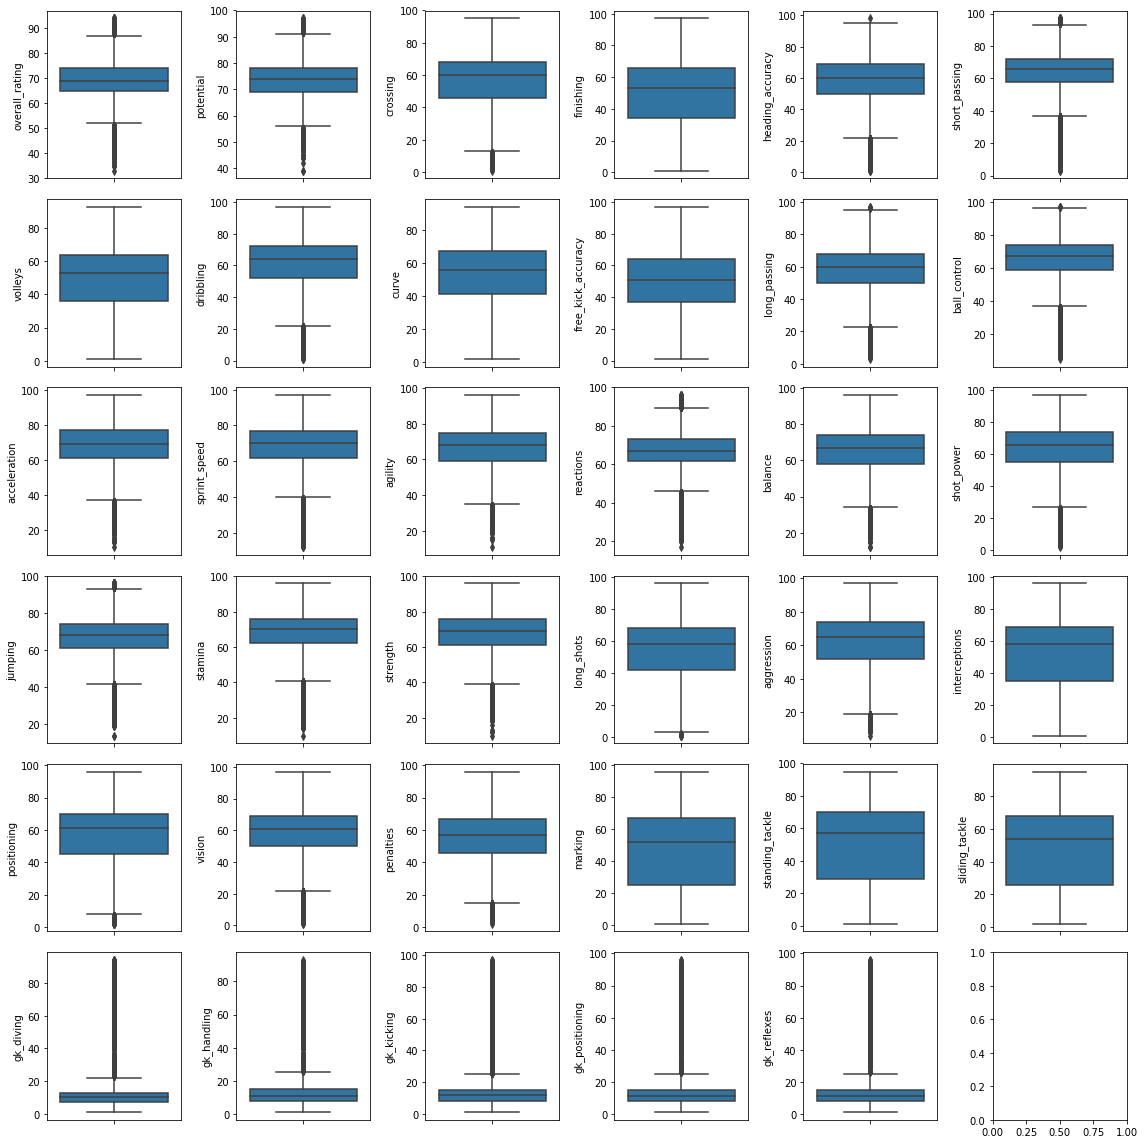

In [45]:
fig,ax4=plt.subplots(ncols=6,nrows=6,figsize=(16,16))
for i,j in enumerate(soccer_imputed.select_dtypes(include=['int','float'])):
    sns.boxplot(soccer_imputed.loc[:,j],ax=ax4[int(i/6)][i%6],orient='v')
fig.tight_layout()
#Boxplot is used to view the outliers peresent in the feature.

C:\Users\saiva\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


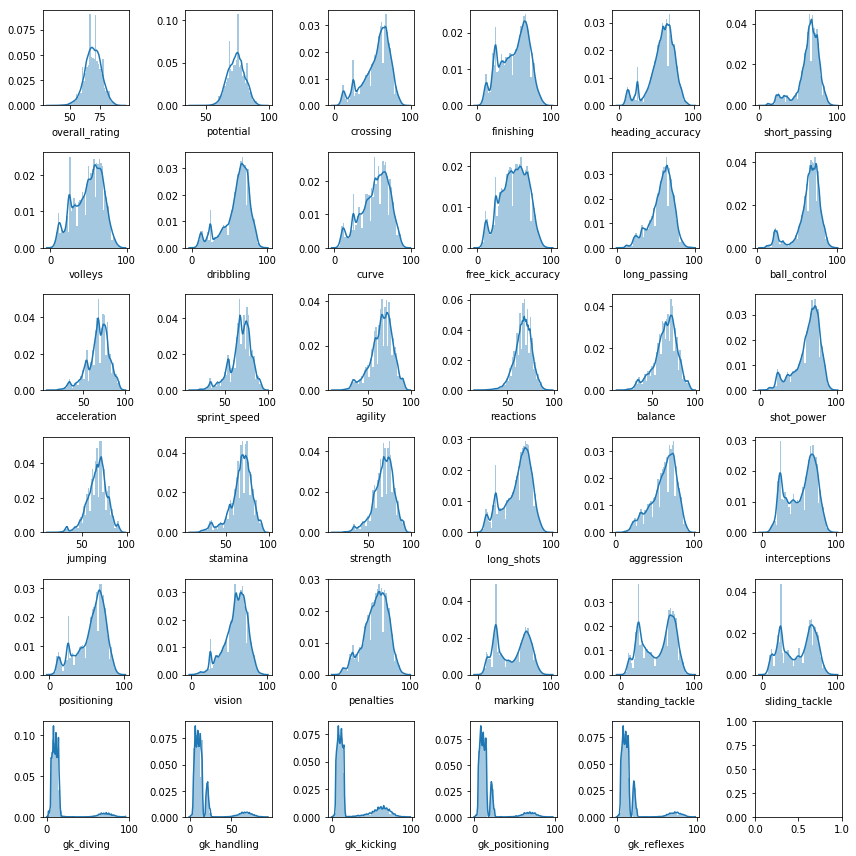

In [46]:
fig,ax5=plt.subplots(ncols=6,nrows=6,figsize=(12,12))
for i,j in enumerate(soccer_imputed.select_dtypes(include=['int','float'])):
    sns.distplot(soccer_imputed.loc[:,j],hist=True,ax=ax5[int(i/6)][i%6])
fig.tight_layout()
#Here we can observe the distributions of all the numercal features.


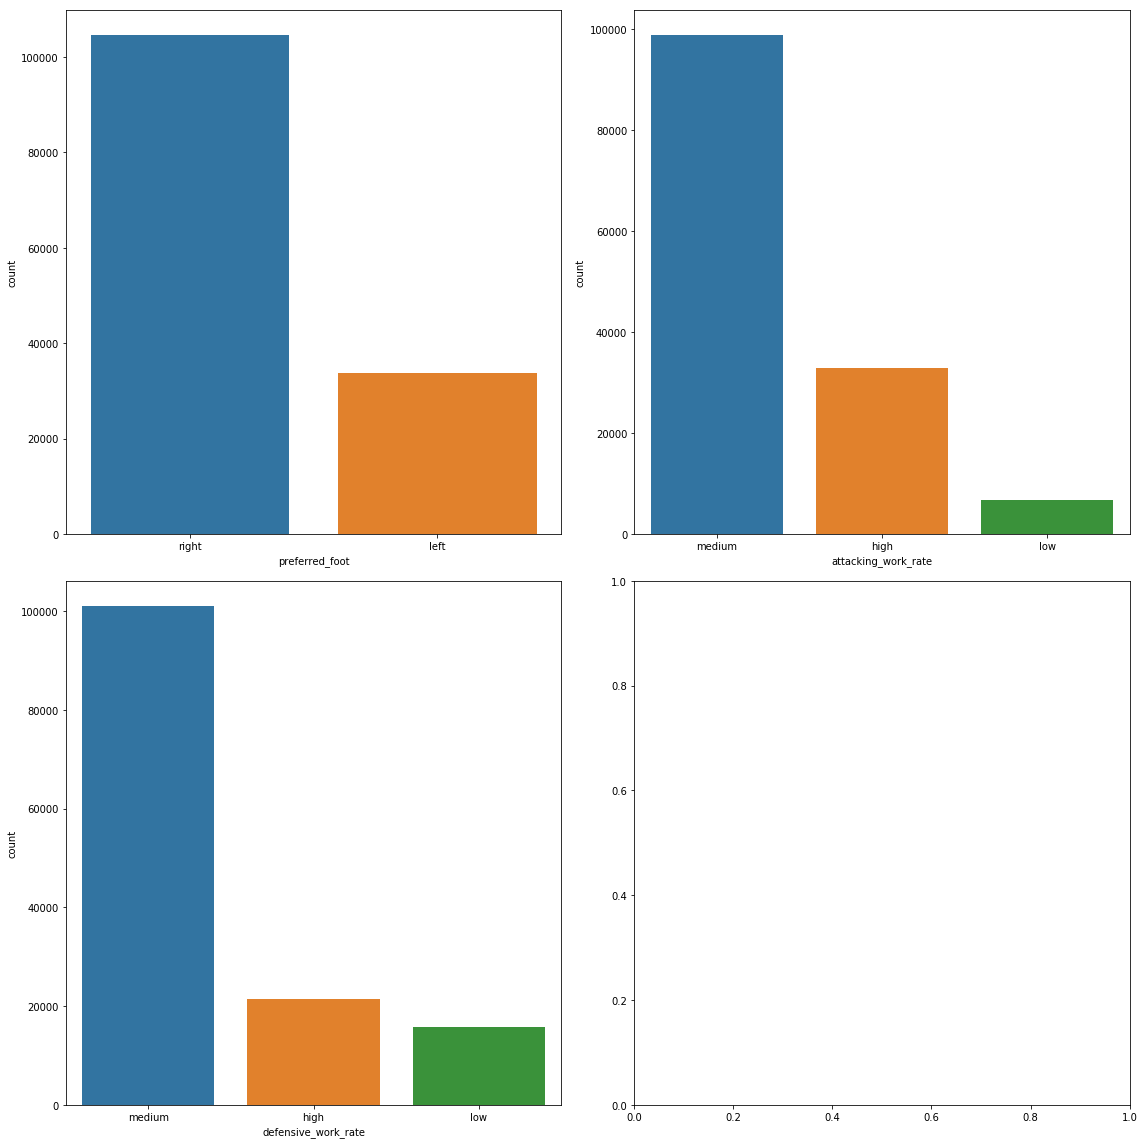

In [47]:
fig,ax2=plt.subplots(nrows=2,ncols=2,figsize=(16,16),squeeze=False)

for i,j in enumerate(soccer_imputed.select_dtypes(include=['object'])):
    sns.countplot(x=j,data=soccer_imputed,ax=ax2[int(i/2)][i%2])
    
fig.tight_layout()
#Countplot for all the Categorical Variables.

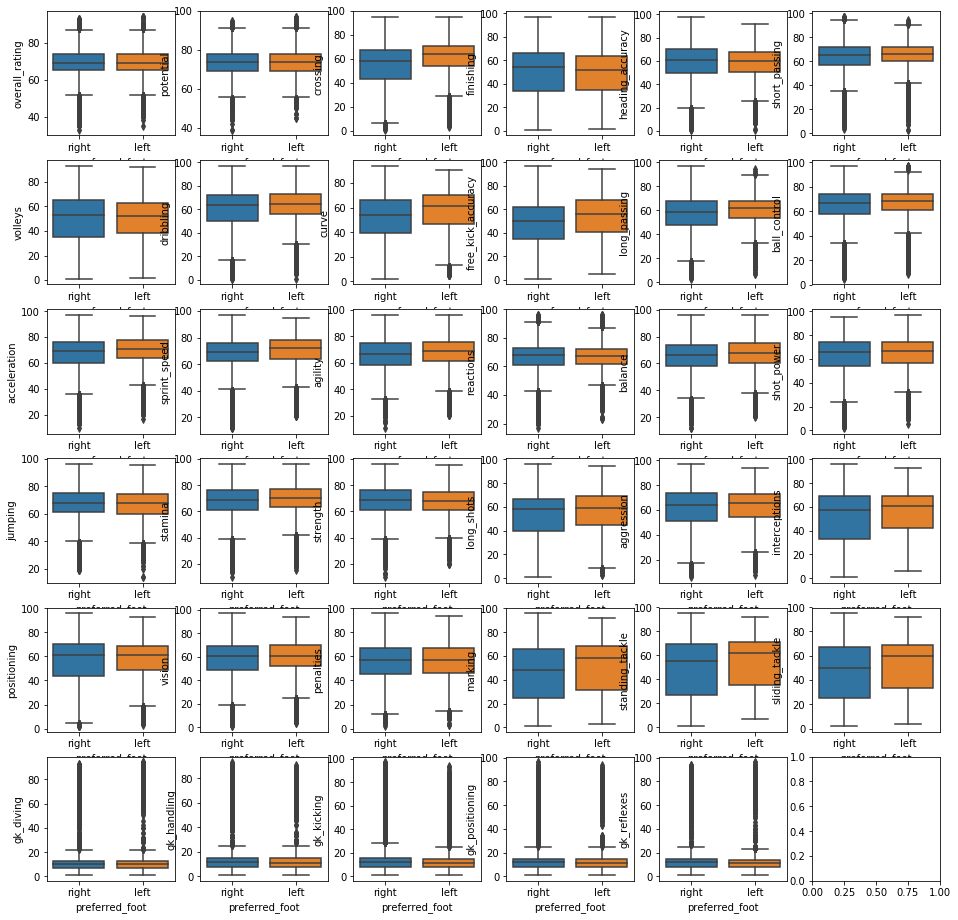

In [48]:
fig,ax5=plt.subplots(nrows=6,ncols=6,figsize=(16,16))
for i,j in enumerate(soccer_imputed.select_dtypes(include=['int64','float64'])):
    sns.boxplot(data=soccer_imputed,x='preferred_foot',y=j,ax=ax5[int(i/6)][i%6])
#defensive_work_rate against all the Numerical features.

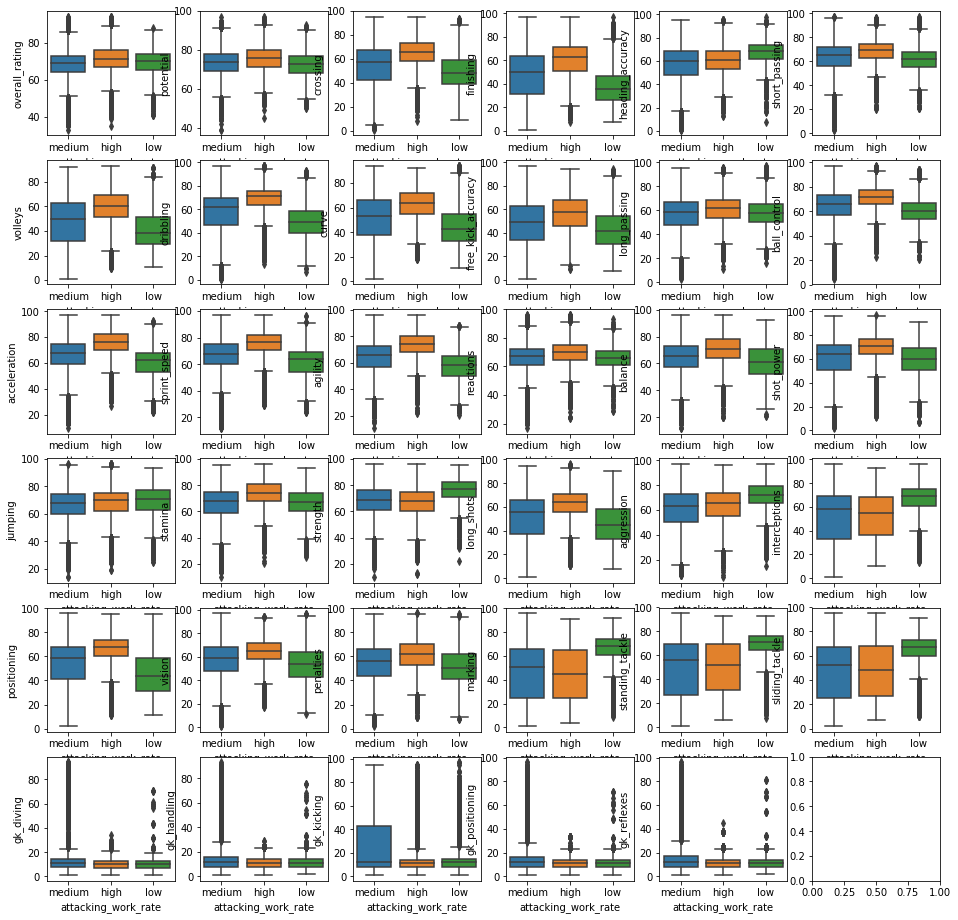

In [49]:

fig,ax4=plt.subplots(nrows=6,ncols=6,figsize=(16,16))
for i,j in enumerate(soccer_imputed.select_dtypes(include=['int64','float64'])):
    sns.boxplot(data=soccer_imputed,x='attacking_work_rate',y=j,ax=ax4[int(i/6)][i%6])
#Attacking_work_rate against all the Numerical features.


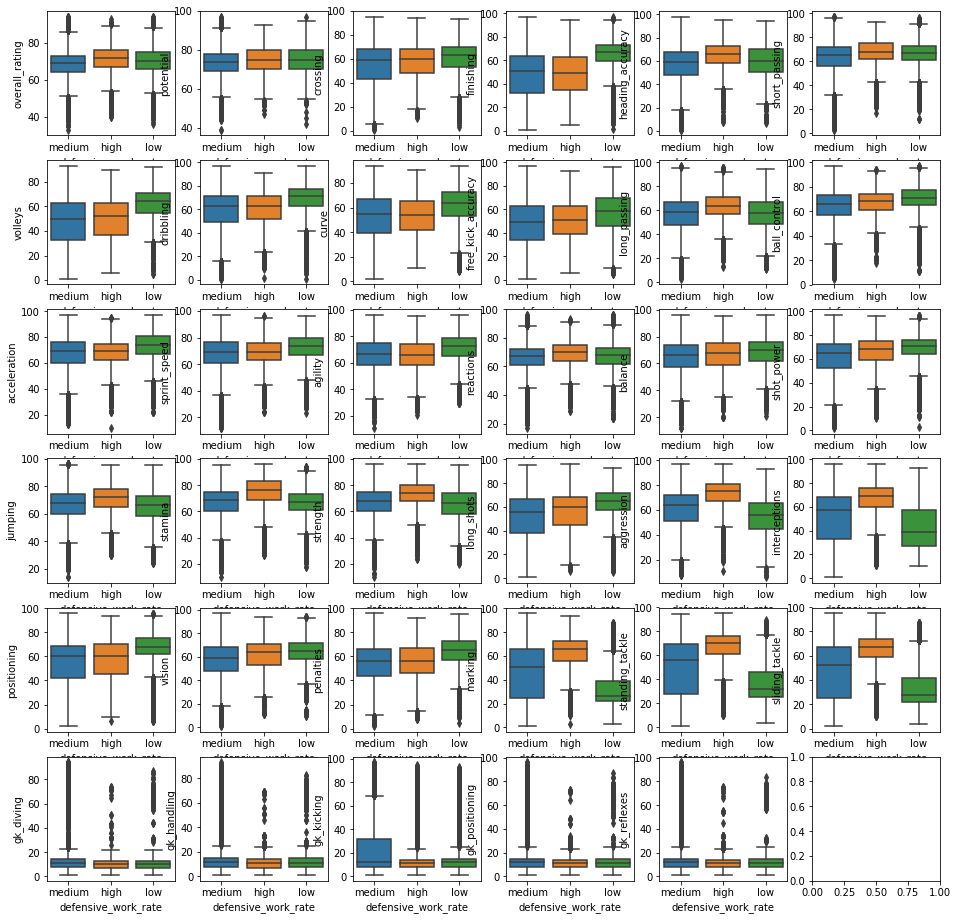

In [50]:
fig,ax5=plt.subplots(nrows=6,ncols=6,figsize=(16,16))
for i,j in enumerate(soccer_imputed.select_dtypes(include=['int64','float64'])):
    sns.boxplot(data=soccer_imputed,x='defensive_work_rate',y=j,ax=ax5[int(i/6)][i%6])
#defensive_work_rate against all the Numerical features.

<h4>Working with Outliers</h4>

In [51]:
z_score=np.abs(stats.zscore(soccer_imputed[numerical_var]))
z_score
#This array consists of the ascores of all the data

array([[0.3345008 , 0.45737334, 0.37364412, ..., 0.53232891, 0.50866611,
        0.49545821],
       [1.06324122, 1.22044493, 0.37364412, ..., 0.53232891, 0.50866611,
        0.49545821],
       [1.20898931, 1.37305924, 0.43091073, ..., 0.5773541 , 0.56917511,
        0.55214018],
       ...,
       [1.12298005, 0.91615553, 1.05802097, ..., 2.30425851, 0.21744192,
        0.18472544],
       [1.26872813, 1.06876985, 1.05802097, ..., 2.30425851, 0.21744192,
        0.18472544],
       [1.5602243 , 1.06876985, 1.05802097, ..., 2.5293845 , 0.56917511,
        0.09868442]])

In [52]:
soccer_data_in=soccer_imputed[(z_score<3).all(axis=1)]
#considering the data tha lies in 3 standard deviations

In [53]:
soccer_data_in.head()

,preferred_foot,attacking_work_rate,defensive_work_rate,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,right,medium,medium,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,right,medium,medium,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
2,right,medium,medium,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
3,left,high,medium,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
4,left,high,medium,74.0,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [54]:
soccer_data_in.shape
#Now we can observe the decrese in the number of rows as the outliers are deleted from the dataset


(123660, 38)

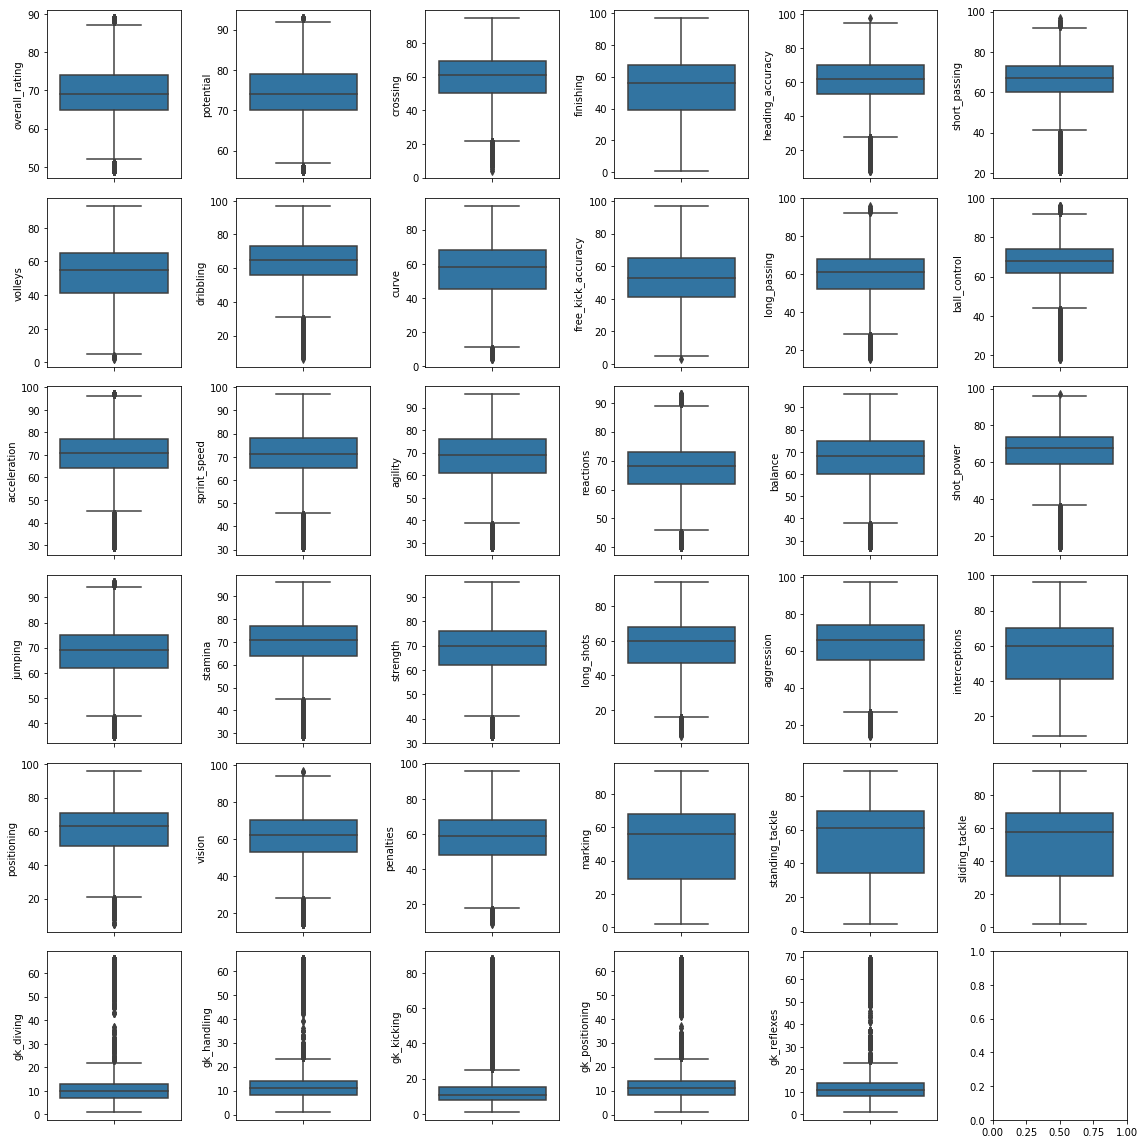

In [55]:
fig,ax6=plt.subplots(nrows=6,ncols=6,figsize=(16,16))

for i,j in enumerate(soccer_data_in.select_dtypes(include=['int64','float64'])):
    sns.boxplot(y=j,data=soccer_data_in,ax=ax6[int(i/6)][i%6], orient='v')
fig.tight_layout()
#After removing the data that lies out of 3 standard deviations.

<h4>Encoding the categorical data</h4>

In [56]:
soccer_data_in_dummy = pd.get_dummies(soccer_data_in[cat_var], prefix_sep='_',drop_first=True)
soccer_data_in_dummy.head()
#As the model would perform better with the numerical data,Creating the dummy data for the categorical variables using pd.get_dummies

,preferred_foot_right,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_low,defensive_work_rate_medium
0,1,0,1,0,1
1,1,0,1,0,1
2,1,0,1,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [57]:
soccer_data_in_dummy.shape

(123660, 5)

<h4>Normalising Numerical Features</h4>

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()

In [60]:
soccer_data_in_norm=pd.DataFrame(data=scaler.fit_transform(soccer_data_in.select_dtypes(include=['int64','float64'])),columns=numerical_var)
soccer_data_in_norm.shape

(123660, 35)

In [61]:
soccer_data_in_norm.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,-0.364236,-0.489014,-0.694774,-0.518603,0.773876,-0.498921,-0.532519,-0.877374,-0.729853,-0.846209,0.350642,-1.787874,-0.892095,-0.600584,-0.754062,-2.400851,-0.165940,-0.790606,-0.992927,-1.532173,0.654545,-1.383297,0.496904,0.799338,-0.920198,-0.529076,-0.712890,0.727905,0.742951,0.857388,-0.758166,-0.157815,-0.433392,-0.622577,-0.597542
1,-1.119201,-1.269353,-0.694774,-0.518603,0.773876,-0.498921,-0.532519,-0.877374,-0.729853,-0.846209,0.350642,-1.787874,-0.892095,-0.600584,-0.754062,-2.400851,-0.165940,-0.790606,-0.992927,-1.532173,0.654545,-1.383297,-0.068531,-0.780485,-0.920198,-0.529076,-0.712890,0.727905,0.595181,0.857388,-0.758166,-0.157815,-0.433392,-0.622577,-0.597542
2,-1.270194,-1.425420,-0.765748,-0.576134,0.694140,-0.598112,-0.593820,-0.950106,-0.793975,-0.909094,0.268358,-1.885418,-0.892095,-0.600584,-0.754062,-2.519440,-0.165940,-0.867324,-0.992927,-1.532173,0.654545,-1.446457,-0.139210,-0.834962,-0.983753,-0.606760,-0.786155,0.581854,0.447410,0.711736,-0.937019,-0.312683,-0.486316,-0.777406,-0.746009
3,0.692716,0.291325,1.505412,-0.000829,-0.262688,0.492989,-0.777722,0.722726,0.873199,1.040350,0.679779,0.358097,0.818791,0.718755,0.887918,-0.029063,1.986017,0.436882,1.674801,0.860798,-1.105942,0.322025,0.284866,0.635908,0.033130,0.403139,0.093026,1.263427,1.038493,1.294343,0.672656,-0.777287,-0.486316,-0.467747,-0.003674
4,0.692716,0.291325,1.505412,-0.000829,-0.262688,0.492989,-1.268126,0.722726,0.873199,1.040350,0.679779,0.358097,0.818791,0.718755,0.887918,-0.029063,1.986017,0.436882,1.674801,0.860798,-1.105942,0.195705,0.284866,0.635908,0.033130,0.403139,0.093026,1.263427,1.038493,1.294343,0.672656,-0.777287,-0.486316,-0.467747,-0.003674


In [62]:
soccer_data_in_norm.index

RangeIndex(start=0, stop=123660, step=1)

In [63]:
soccer_data_in_dummy.index=soccer_data_in_norm.index

In [64]:
soccer_data_in_dummy.index

RangeIndex(start=0, stop=123660, step=1)

In [65]:
soccer_data_in_norm.isnull().sum()

overall_rating        0
potential             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys               0
dribbling             0
curve                 0
free_kick_accuracy    0
long_passing          0
ball_control          0
acceleration          0
sprint_speed          0
agility               0
reactions             0
balance               0
shot_power            0
jumping               0
stamina               0
strength              0
long_shots            0
aggression            0
interceptions         0
positioning           0
vision                0
penalties             0
marking               0
standing_tackle       0
sliding_tackle        0
gk_diving             0
gk_handling           0
gk_kicking            0
gk_positioning        0
gk_reflexes           0
dtype: int64

In [66]:
soccer_norm_data=pd.concat([soccer_data_in_dummy,soccer_data_in_norm],axis=1)

In [67]:
#norm_data=data_in_norm.merge(data_in_dummy,left_index=True, right_index=True)
soccer_norm_data.isnull().sum()

preferred_foot_right          0
attacking_work_rate_low       0
attacking_work_rate_medium    0
defensive_work_rate_low       0
defensive_work_rate_medium    0
overall_rating                0
potential                     0
crossing                      0
finishing                     0
heading_accuracy              0
short_passing                 0
volleys                       0
dribbling                     0
curve                         0
free_kick_accuracy            0
long_passing                  0
ball_control                  0
acceleration                  0
sprint_speed                  0
agility                       0
reactions                     0
balance                       0
shot_power                    0
jumping                       0
stamina                       0
strength                      0
long_shots                    0
aggression                    0
interceptions                 0
positioning                   0
vision                        0
penaltie

In [68]:
soccer_norm_data.shape

(123660, 40)

In [69]:
X=soccer_norm_data.drop(['overall_rating'],axis=1)


In [70]:
y=soccer_norm_data[['overall_rating']]

In [71]:
y.head()

,overall_rating
0,-0.364236
1,-1.119201
2,-1.270194
3,0.692716
4,0.692716


<h6>Box plot for all the Numerical features after removing outliers.</h6>


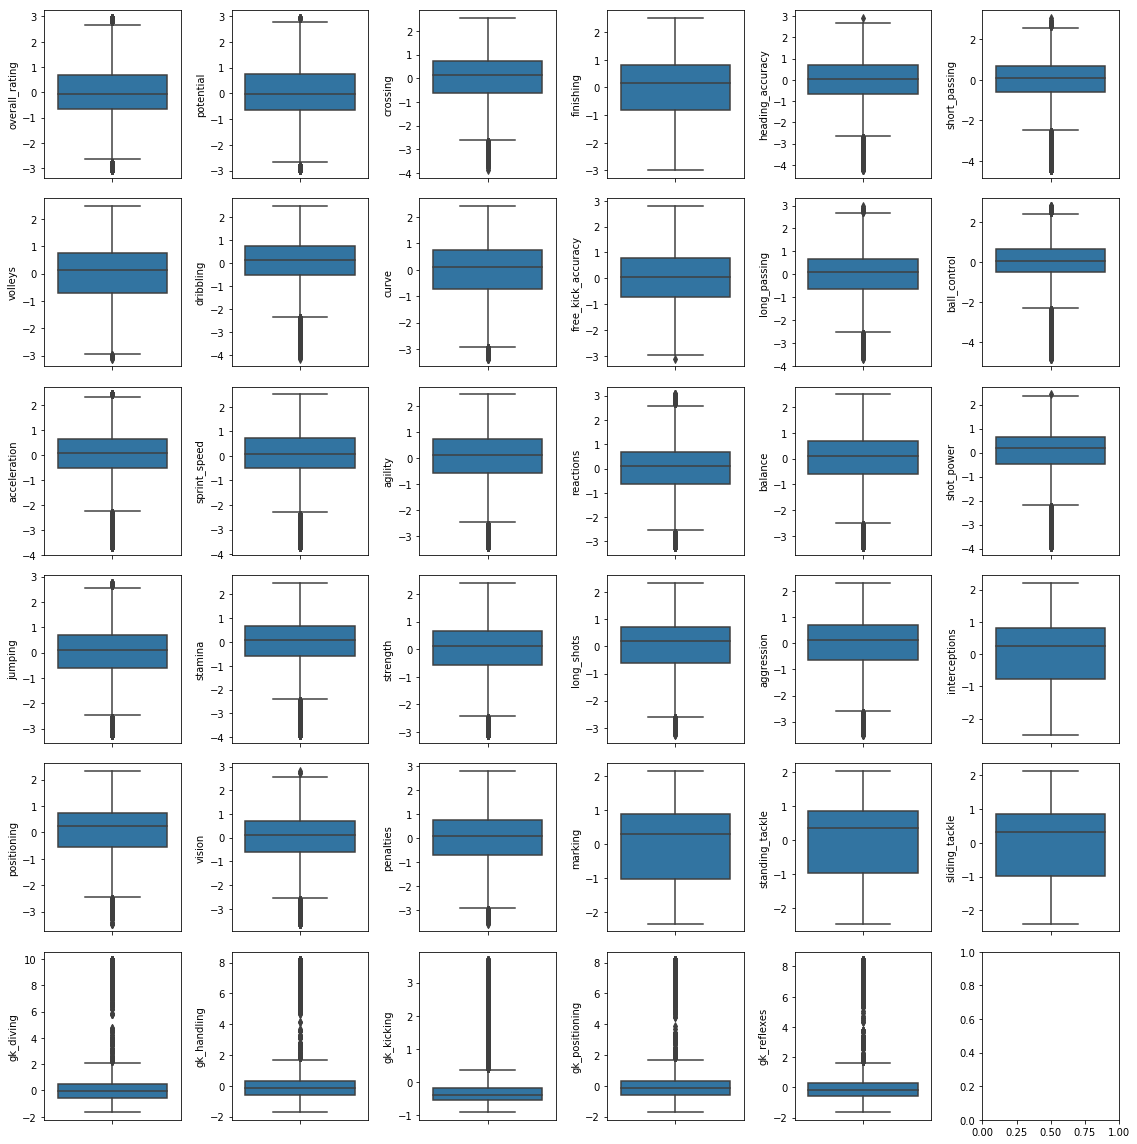

In [72]:
fig,ax3=plt.subplots(nrows=6,ncols=6)
fig.set_size_inches(16,16)
for i,j in enumerate(soccer_norm_data.select_dtypes(include = ['float64','int64'])):
    sns.boxplot(y=j,data=soccer_norm_data,ax=ax3[int(i/6)][i%6])
fig.tight_layout()

In [73]:
soccer_norm_data_corr=soccer_norm_data.corr()
soccer_norm_data_corr['overall_rating'].sort_values(ascending=False)
#Features correlation with the target variable(Overall_rating) sorted in descending order.

overall_rating                1.000000
reactions                     0.784402
potential                     0.769177
ball_control                  0.681255
short_passing                 0.662088
shot_power                    0.543347
vision                        0.513385
long_passing                  0.508584
dribbling                     0.481901
long_shots                    0.472519
penalties                     0.460259
crossing                      0.452598
positioning                   0.452321
heading_accuracy              0.439838
curve                         0.439213
volleys                       0.434759
free_kick_accuracy            0.407990
stamina                       0.401165
finishing                     0.382817
aggression                    0.354314
sprint_speed                  0.305392
strength                      0.300018
acceleration                  0.290164
interceptions                 0.270936
agility                       0.263685
jumping                  

In [74]:
type(soccer_norm_data_corr)

pandas.core.frame.DataFrame

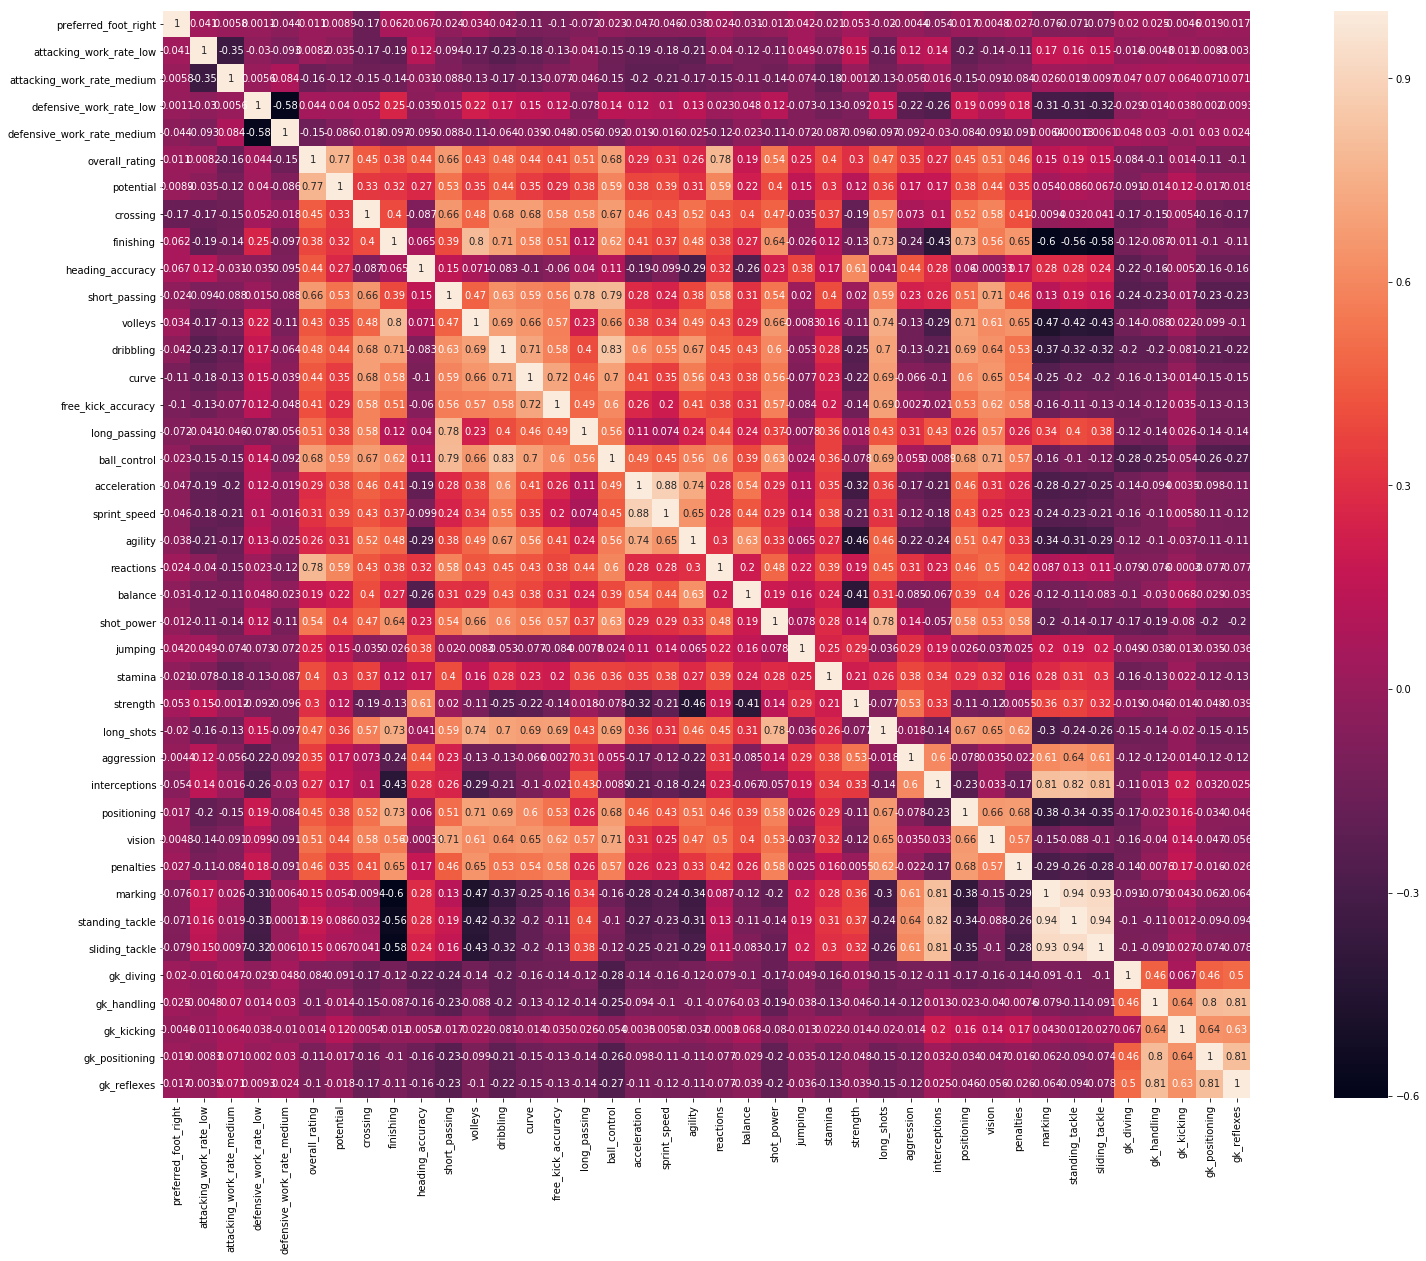

In [75]:
fig,ax=plt.subplots(figsize=(30,20))
sns.heatmap(soccer_norm_data_corr,ax=ax,vmax=1,square=True,annot=True)

C:\Users\saiva\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


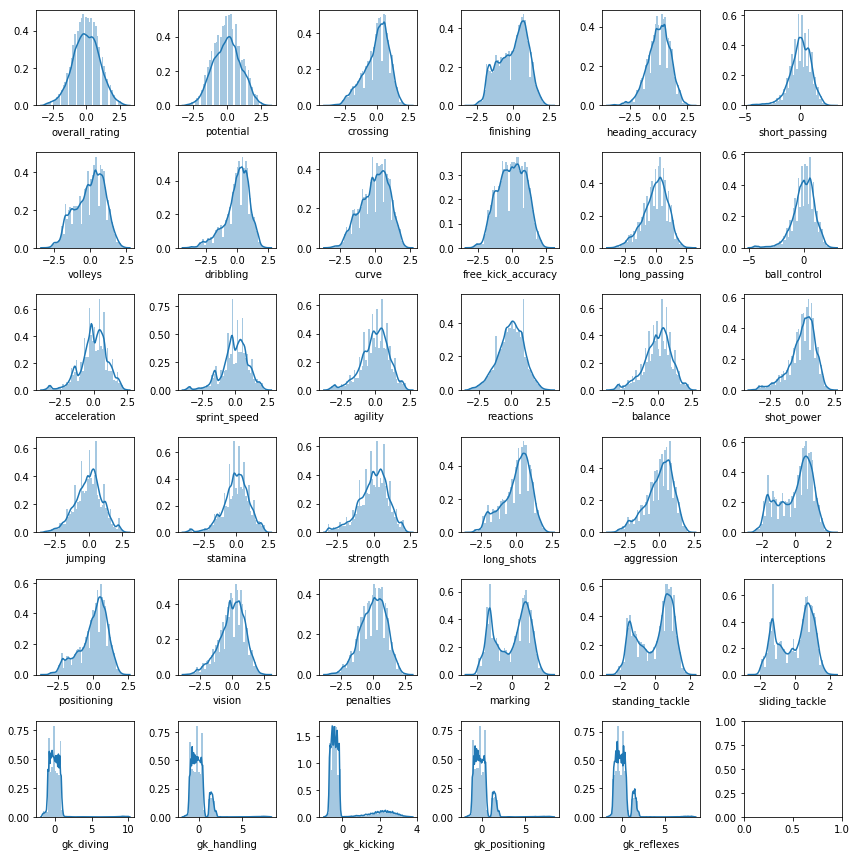

In [76]:
fig,ax7=plt.subplots(ncols=6,nrows=6,figsize=(12,12))
for i,j in enumerate(soccer_norm_data.select_dtypes(include=['int','float'])):
    sns.distplot(soccer_norm_data.loc[:,j],hist=True,ax=ax7[int(i/6)][i%6])
fig.tight_layout()

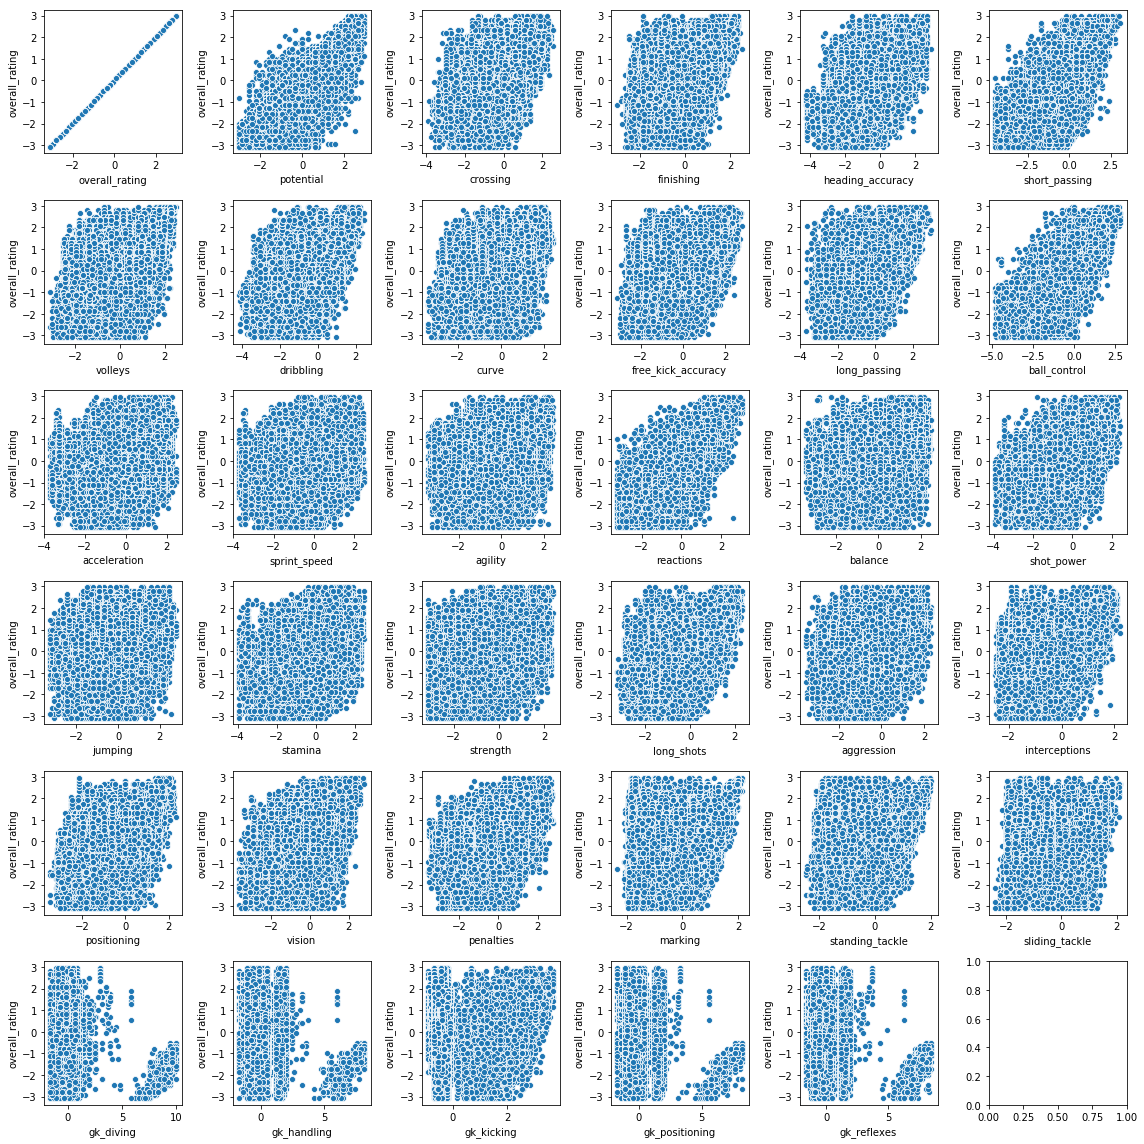

In [77]:
fig,ax9=plt.subplots(nrows=6,ncols=6,figsize=(16,16))
for i,j in enumerate(soccer_data_in_norm.select_dtypes(include=['int64','float64'])):
    sns.scatterplot(x=j,y='overall_rating',data=soccer_data_in_norm,ax=ax9[int(i/6)][i%6])
fig.tight_layout()

In [78]:
median=pd.DataFrame(soccer_imputed.median(),columns=['median'])
median

,median
overall_rating,69.0
potential,74.0
crossing,60.0
finishing,53.0
heading_accuracy,60.0
short_passing,66.0
volleys,53.0
dribbling,64.0
curve,56.0
free_kick_accuracy,51.0


In [79]:
mean=pd.DataFrame(data_imputed.mean(),columns=['mean'])
mean

NameError: name 'data_imputed' is not defined

In [ ]:
#Removing varoables that are least correlated with overall_rating
low_corr_cols=[]
for key in dict(soccer_norm_data_corr['overall_rating']):
        
    if dict(soccer_norm_data_corr['overall_rating'])[key]  < 0.2:
        low_corr_cols.append(key)
#soccer_norm_data_rem_low_corr_cols=soccer_norm_data.drop(columns=low_corr_cols)
#soccer_norm_data_rem_low_corr_cols
low_corr_cols

<h6>MultiCollinearity Analysis</h6>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=pd.DataFrame()

In [ ]:
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [ ]:
vif['features']=X.columns

In [ ]:
vif

In [ ]:
high_vif_features=['marking','standing_tackle','sliding_tackle']
#grouping the features having high VIF factor.

In [ ]:
X=X.drop(columns=high_vif_features)
#To remove Multicollinearity among the features we should remove the features having high VIF(Variation Inflaiton Factor)

In [ ]:
X.shape
#After removing the features having high VIF

<h2>Modelling</h2>


<h5>LinerRegression</h5>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,mean_squared_error,r2_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
linear=LinearRegression()

In [ ]:
model_fit=linear.fit(X_train,y_train)

In [ ]:
model_fit.intercept_

In [ ]:
model_fit.coef_

In [ ]:
(np.transpose(model_fit.coef_))

In [ ]:
X_coeff=pd.concat([pd.DataFrame(X_train.columns,columns=['X_variable']),pd.DataFrame(np.transpose(model_fit.coef_),columns=['Coefficients'])],axis=1)
X_coeff

In [ ]:
y_predict=model_fit.predict(X_test)

In [ ]:
y_predict

In [ ]:
residual=y_test-y_predict
#residual

In [ ]:
rmse = mean_squared_error(y_test, y_predict)

In [ ]:
rmse

In [ ]:
X_test.shape

In [ ]:
r2 = r2_score(y_test,y_predict)

In [ ]:
r2

In [ ]:
vif=1/(1-r2)
vif
#Check for Multicollinearity among the features available int he dataset

In [ ]:
#adjusted_r2=1-((1-r2)[n-1/(n-(k+1))])
#n=sample size,37098
#k=number of features,36
n=37098
k=36
adjusted_r2=(1-((1-r2)*((n-1)/(n-(k+1)))))
adjusted_r2

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(x=y_test,y=y_predict,alpha=0.5)
#plt.plot(x=y_test,y=y_predict,marker='-')
#plt.legend()
plt.show()

<h6>Check for Homoskedasticity</h6>

In [ ]:
#plt.plot(y_test,)
plt.figure(figsize=(15,15))
plt.scatter(y_predict,(y_test-y_predict),alpha=0.3)
plt.xlabel('Predicted y')
plt.ylabel('y Residual')
#plt.xlim([-4, 4])
#plt.ylim([-3, 3])
plt.title('Residual Plot')



In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(x='reactions',y=residual['overall_rating'],data=X_test,alpha=0.5)
plt.xlabel('reactions')
plt.ylabel('residual')
#Analysing the reactions feature against the residual

In [ ]:
fig,ax11=plt.subplots(nrows=6,ncols=6,figsize=(16,16))
for i,j in enumerate(X_test.select_dtypes(include=['int64','float64'])):
    sns.scatterplot(x=j,y=residual['overall_rating'],data=X_test,ax=ax11[int(i/6)][i%6])
fig.tight_layout()
#Each feature plotted against the residual

In [ ]:
plt.hist(residual['overall_rating'],bins=8)
plt.title('Residual Distribution')
plt.show

In [ ]:
residual.min()

In [ ]:
residual.max()

In [ ]:
residual_range=residual.max()-residual.min()

In [ ]:
residual_range

In [ ]:
y_predict_range=y_predict.max()-y_predict.min()
y_predict_range

In [ ]:
residual_range_per=residual_range/y_predict_range
residual_range_per

<h6>Ridge Regression using GridSearchCV</h6>

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
params={'alpha':[55,50,45,40,35,30,25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}

In [ ]:
ridge=Ridge()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search_ridge=GridSearchCV(estimator=ridge,param_grid=params)

In [ ]:
grid_search_ridge.fit(X_train,y_train)

In [ ]:
grid_search_ridge.best_score_

In [ ]:
grid_search_ridge.best_params_

In [ ]:
#grid_search_ridge_test=GridSearchCV(estimator=Ridge,param_grid=params)

In [ ]:
y_predict_ridge=grid_search_ridge.predict(X_test)

In [ ]:
residual_ridge=y_test-y_predict_ridge
#residual_ridge

In [ ]:
rmse_ridge=mean_squared_error(y_test,y_predict_ridge)
rmse_ridge

In [ ]:
r2_ridge=r2_score(y_test,y_predict_ridge)
r2_ridge

<h6>Lasso Regression</h6>

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()

In [ ]:
lasso_params={'alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,0,0.2,0.4,0.5,0.7,0.8,1,3,5,7,1]}

In [ ]:
grid_search_lasso=GridSearchCV(estimator=lasso,param_grid=lasso_params)

In [ ]:
grid_search_lasso.fit(X_train,y_train)

In [ ]:
grid_search_lasso.best_score_

In [ ]:
grid_search_lasso.best_params_

In [ ]:
y_predict_lasso=grid_search_lasso.predict(X_test)

In [ ]:
r2_lasso=r2_score(y_test,y_predict)
r2_lassos

StatsModel-Linear Regression

In [ ]:
import statsmodels.api as sm

In [ ]:
ols=sm.OLS(y_train,X_train).fit()

In [ ]:
y_predict_ols=ols.predict(X_test)

In [ ]:
residual_ols=(y_test-y_predict_ols)

Decission Tree Regressor:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decission_tree_reg=DecisionTreeRegressor()

In [ ]:
dt_params = {"criterion": ["mse"],
              "min_samples_split": [80,100,200,500],
              "max_depth": [15,20],
              "min_samples_leaf": [10,20,30,40,50],
              "max_leaf_nodes": [100,500,1000],
              } 


In [ ]:
grid_search_dt=GridSearchCV(estimator=decission_tree_reg,param_grid=dt_params)

In [ ]:
grid_search_dt.fit(X_train,y_train)

In [ ]:
grid_search_dt.best_score_

In [ ]:
grid_search_dt.best_params_

In [ ]:
y_predict_dt=grid_search_dt.predict(X_test)

In [ ]:
dt_score=r2_score(y_test,y_predict_dt)
dt_score

RandomForest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest_reg=RandomForestRegressor()

In [ ]:
rf_params={"n_estimators":[500,600,700,800]
           ,  'n_jobs':[-1]
           }

In [ ]:
grid_search_rf=GridSearchCV(estimator=random_forest_reg,param_grid=rf_params)

In [ ]:
y_train.shape

In [ ]:
grid_search_rf.fit(X_train,y_train.values.ravel())

In [ ]:
grid_search_rf.best_score_

In [ ]:
grid_search_rf.best_params_

In [ ]:
y_predict_rf=grid_search_rf.predict(X_test)

In [ ]:
residual_rf=y_test-y_predict
#residual

In [ ]:
residual_range_rf=(residual_rf.max()-residual_rf.min())
residual_range_rf

In [ ]:
rf_score=r2_score(y_test,y_predict)
rf_score
#Validation on test data